In [1]:
import gdsfactory as gf
import warnings


In [2]:
from gdsfactory.generic_tech import get_generic_pdk
warnings.filterwarnings('ignore')

In [3]:
@gf.cell
def nplus(width,height,layerno):
    comp = gf.Component("nplus")
    nplus = gf.components.rectangle(size=(width,height),layer=layerno)
    nplus=comp << nplus
    return comp
@gf.cell
def pplus(width,height,layerno):
    comp = gf.Component("pplus")
    nplus = gf.components.rectangle(size=(width,height),layer=layerno)
    nplus=comp << nplus
    return comp
@gf.cell
def nwell(width,height,layerno):
    comp = gf.Component("nwell")
    nwell = gf.components.rectangle(size=(width,height),layer=layerno)
    nwell=comp << nwell
    return comp
@gf.cell
def diff(width,height,layerno):
    comp = gf.Component("diff")
    diff = gf.components.rectangle(size=(width,height),layer=layerno)
    diff=comp << diff
    return comp
@gf.cell
def poly(width,height,layerno):
    comp = gf.Component("poly")
    poly = gf.components.rectangle(size=(width,height),layer=layerno)
    poly=comp << poly
    return comp
@gf.cell
def contact(width,height,layerno):
    comp = gf.Component("contact")
    contact = gf.components.rectangle(size=(width,height),layer=layerno)
    contact=comp << contact
    return comp
@gf.cell
def metal1(width,height,layerno):
    comp = gf.Component("rect")
    metal1 = gf.components.rectangle(size=(width,height),layer=layerno)
    metal1=comp << metal1
    return comp
@gf.cell
def sab(width,height,layerno):
    comp = gf.Component("sab")
    sab = gf.components.rectangle(size=(width,height),layer=layerno)
    sab=comp << sab
    return comp


2023-04-02 23:47:18.282 | WARNING  | gdsfactory.pdk:get_active_pdk:563 - No active PDK. Activating generic PDK.



You can install `pip install gdsfactory[full]` for better visualization


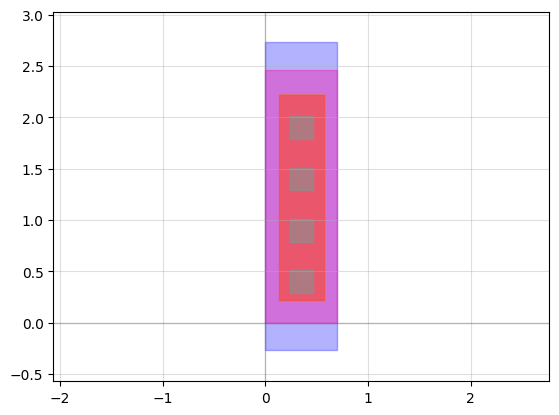

nwell_contact: uid 62187d2e, ports [], references ['nplus_1', 'diff_1', 'contact_1', 'contact_2', 'contact_3', 'contact_4', 'nwell_1', 'metal1_1'], 0 polygons


In [4]:
def nwell_contact(width):
    comp = gf.Component("nwell_contact")
    con_no = round((width-0.13)/(0.22+0.28))
    con = [0]*(con_no);
    nplus_con = comp << nplus(0.44+(0.13*2),width+(0.22*2)+0.02,32)
    diff_con = comp << diff(0.44,width,22)
    diff_con.movex(0.13).movey(0.22)
    if (con_no >=1):
        for k in range(con_no):
            con[k] = comp << contact(0.22,0.22,33)
            con[k].movex(0.11+0.13).movey(0.13+0.16+k*0.5)
    else:
        nwcon = comp << contact(0.22,0.22,33)
        nwcon.movex(0.11+0.13).movey(0.13+0.22)
    nw = comp << nwell(0.44+(0.13*2),(width+(0.22*2)+0.02)+(0.27*2),21)
    nw.movey(-0.27)
    metal_con = comp << metal1(0.44,width+0.02,34)
    metal_con.movex(0.13).movey(0.21)
    return comp
pc1 = nwell_contact(2)

pc1

    

You can install `pip install gdsfactory[full]` for better visualization


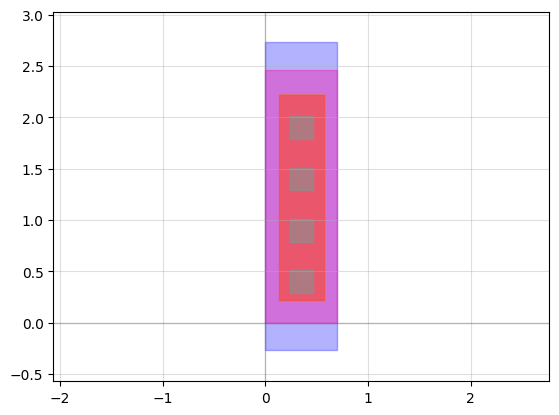

nwell_contact: uid a7121353, ports [], references ['nplus_1', 'diff_1', 'contact_1', 'contact_2', 'contact_3', 'contact_4', 'nwell_1', 'metal1_1'], 0 polygons


In [5]:
def sub_contact(width):
    comp = gf.Component("sub_contact")
    con_no = round((width-0.13)/(0.22+0.28))
    con = [0]*(con_no);
    pplus_con = comp << pplus(0.44+(0.13*2),width+(0.22*2)+0.02,31)
    diff_con = comp << diff(0.44,width,22)
    diff_con.movex(0.13).movey(0.22)
    if (con_no >=1):
        for k in range(con_no):
            con[k] = comp << contact(0.22,0.22,33)
            con[k].movex(0.11+0.13).movey(0.13+0.16+k*0.5)
    else:
        subcon = comp << contact(0.22,0.22,33)
        subcon.movex(0.11+0.13).movey(0.13+0.22)
    metal_con = comp << metal1(0.44,width+0.02,34)
    metal_con.movex(0.13).movey(0.21)
    return comp

pc2 = nwell_contact(2)

pc2

You can install `pip install gdsfactory[full]` for better visualization


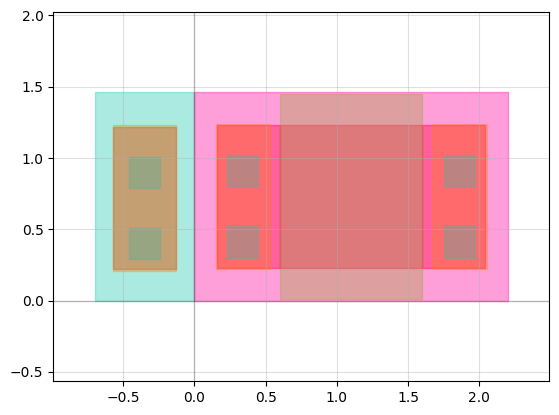

nfet: uid 627c8fa3, ports [], references ['nplus_1', 'diff_1', 'diff_2', 'diff_3', 'poly_1', 'metal1_1', 'metal1_2', 'sub_contact_1', 'contact_1', 'contact_2', 'contact_3', 'contact_4'], 0 polygons


In [6]:
def nfet_03p3(width,length):
    comp = gf.Component("nfet")
    contact_no = round((width-0.07)/(0.22+0.28))
    nfet_contactl = [0]*(contact_no);
    nfet_contactr = [0]*(contact_no);
    if (width >= 0.4):
        nfet_nplus = comp << nplus(0.44*2+length+0.16*2,width+(0.22*2)+0.02,32)
        nfet_diffr = comp << diff(0.44,width,22)
        nfet_diffl = comp << diff(0.44,width,22)
        nfet_diffm = comp << diff(length,width,22)
        nfet_poly  = comp << poly(length,width+(0.22*2),30)
        nfet_metal1_le  = comp << metal1(0.38,width+0.02,34)
        nfet_metal1_ri  = comp << metal1(0.38,width+0.02,34)
        nfet_sub_contact = comp << sub_contact(width)   
        nfet_sub_contact.movex(-(0.44+0.26))
        if (contact_no >=1):
            for i in range(contact_no):
                nfet_contactl[i] = comp << contact(0.22,0.22,33)
                nfet_contactr[i] = comp << contact(0.22,0.22,33)
                nfet_contactl[i].movex(0.16+0.07).movey((0.22+0.01+0.07)+i*(0.5))
                nfet_contactr[i].movex(0.16+0.44+length+0.15).movey(0.22+0.01+0.07+i*(0.5))
        else:
            nfet_contactle = comp << contact(0.22,0.22,33)
            nfet_contactri = comp << contact(0.22,0.22,33)
            nfet_contactle.movex(0.16+0.07).movey(0.22+0.01+0.07)
            nfet_contactri.movex(0.16+0.44+length+0.15).movey(0.22+0.01+0.07)
    
        nfet_diffl.movex(0.16).movey(0.22+0.01)
        nfet_diffr.movex(0.16+(0.44+length)).movey(0.22+0.01)
        nfet_diffm.movex(0.16+0.44).movey(0.22+0.01)
        nfet_poly.movex(0.16+0.44).movey(0.01)
        nfet_metal1_le.movex(0.16-0.01).movey(0.22)
        nfet_metal1_ri.movex(0.16+(0.44+length+0.07)).movey(0.22)
            
    else:
        nfet_nplus = comp << nplus(0.46*2+length+0.16*2,width+(0.22*2)+0.02,32)
        nfet_diffr = comp << diff(0.36,width+0.14,22)
        nfet_diffl = comp << diff(0.36,width+0.14,22)
        nfet_diffm = comp << diff(length+0.2,width,22)
        nfet_poly  = comp << poly(length,width+(0.22*2),30)
        nfet_contactle = comp << contact(0.22,0.22,33)
        nfet_contactri= comp << contact(0.22,0.22,33) 
        nfet_metal1_le  = comp << metal1(0.38,width+0.14+0.02,34)
        nfet_metal1_ri  = comp << metal1(0.38,width+0.14+0.02,34)
        nfet_sub_contact = comp << sub_contact(width)   
        nfet_sub_contact.movex(-(0.44+0.26))

        nfet_diffl.movex(0.16).movey(0.22+0.01-0.07)
        nfet_diffr.movex(0.16+(0.46+length+0.1)).movey(0.22+0.01-0.07)
        nfet_diffm.movex(0.16+0.36).movey(0.22+0.01)
        nfet_poly.movex(0.16+0.46).movey(0.01)
        nfet_contactle.movex(0.16+0.07).movey(0.22+0.01)
        nfet_contactri.movex(0.16+0.46+length+0.17).movey(0.22+0.01)
        nfet_metal1_le.movex(0.16-0.01).movey(0.22-0.07)
        nfet_metal1_ri.movex(0.16+(0.46+length+0.09)).movey(0.22-0.07)
         
    
    return comp
    
pc3 = nfet_03p3(1,1)
#pc1.show()
pc3

pc1 = nfet_03p3(1,1)
pc1.show()

You can install `pip install gdsfactory[full]` for better visualization


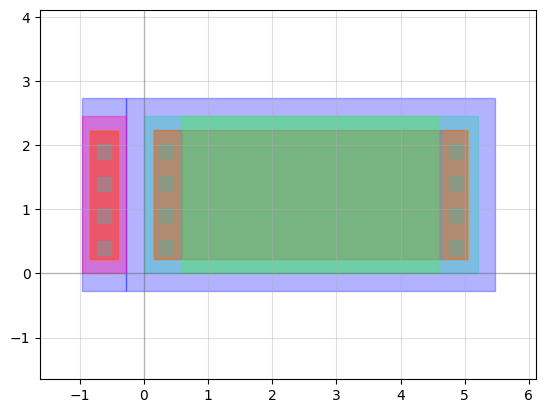

pfet: uid e29d861d, ports [], references ['pplus_1', 'nwell_1', 'diff_1', 'diff_2', 'diff_3', 'poly_1', 'metal1_1', 'metal1_2', 'nwell_contact_1', 'contact_1', 'contact_2', 'contact_3', 'contact_4', 'contact_5', 'contact_6', 'contact_7', 'contact_8'], 0 polygons


In [7]:
def pfet_03p3(width,length):
    comp = gf.Component("pfet")
    contact_no = round((width-0.07)/(0.22+0.28))
    pfet_contactl = [0]*(contact_no);
    pfet_contactr = [0]*(contact_no);
    if (width >= 0.4):
        pfet_pplus = comp << pplus(0.44*2+length+0.16*2,width+(0.22*2)+0.02,31)
        pfet_nwell = comp << nwell((0.44*2+length+0.16*2)+(0.27*2),(width+(0.22*2)+0.02)+(0.27*2),21)
        pfet_diffr = comp << diff(0.44,width,22)
        pfet_diffl = comp << diff(0.44,width,22)
        pfet_diffm = comp << diff(length,width,22)
        pfet_poly  = comp << poly(length,width+(0.22*2),30)
        pfet_metal1_le  = comp << metal1(0.38,width+0.02,34)
        pfet_metal1_ri  = comp << metal1(0.38,width+0.02,34)
        pfet_nwell_contact = comp << nwell_contact(width)   
        pfet_nwell_contact.movex(-(0.44+0.26+0.27))
        if (contact_no >=1):
            for i in range(contact_no):
                pfet_contactl[i] = comp << contact(0.22,0.22,33)
                pfet_contactr[i] = comp << contact(0.22,0.22,33)
                pfet_contactl[i].movex(0.16+0.07).movey((0.22+0.01+0.07)+i*(0.5))
                pfet_contactr[i].movex(0.16+0.44+length+0.15).movey(0.22+0.01+0.07+i*(0.5))
        else:
            pfet_contactle = comp << contact(0.22,0.22,33)
            pfet_contactri = comp << contact(0.22,0.22,33)
            pfet_contactle.movex(0.16+0.07).movey(0.22+0.01+0.07)
            pfet_contactri.movex(0.16+0.44+length+0.15).movey(0.22+0.01+0.07)
    
        pfet_nwell.movex(-0.27).movey(-0.27)
        pfet_diffl.movex(0.16).movey(0.22+0.01)
        pfet_diffr.movex(0.16+(0.44+length)).movey(0.22+0.01)
        pfet_diffm.movex(0.16+0.44).movey(0.22+0.01)
        pfet_poly.movex(0.16+0.44).movey(0.01)
        pfet_metal1_le.movex(0.16-0.01).movey(0.22)
        pfet_metal1_ri.movex(0.16+(0.44+length+0.07)).movey(0.22)
            
    else:
        pfet_pplus = comp << pplus(0.46*2+length+0.16*2,width+(0.22*2)+0.02,32)
        pfet_nwell = comp << nwell((0.46*2+length+0.16*2)+(0.27*2),(width+(0.22*2)+0.02)+(0.27*2),21)
        pfet_diffr = comp << diff(0.36,width+0.14,22)
        pfet_diffl = comp << diff(0.36,width+0.14,22)
        pfet_diffm = comp << diff(length+0.2,width,22)
        pfet_poly  = comp << poly(length,width+(0.22*2),30)
        pfet_contactle = comp << contact(0.22,0.22,33)
        pfet_contactri= comp << contact(0.22,0.22,33) 
        pfet_metal1_le  = comp << metal1(0.38,width+0.14+0.02,34)
        pfet_metal1_ri  = comp << metal1(0.38,width+0.14+0.02,34)
        pfet_nwell_contact = comp << nwell_contact(width)   
        pfet_nwell_contact.movex(-(0.44+0.26+0.27))

        pfet_nwell.movex(-0.27).movey(-0.27)
        pfet_diffl.movex(0.16).movey(0.22+0.01-0.07)
        pfet_diffr.movex(0.16+(0.46+length+0.1)).movey(0.22+0.01-0.07)
        pfet_diffm.movex(0.16+0.36).movey(0.22+0.01)
        pfet_poly.movex(0.16+0.46).movey(0.01)
        pfet_contactle.movex(0.16+0.07).movey(0.22+0.01)
        pfet_contactri.movex(0.16+0.46+length+0.17).movey(0.22+0.01)
        pfet_metal1_le.movex(0.16-0.01).movey(0.22-0.07)
        pfet_metal1_ri.movex(0.16+(0.46+length+0.09)).movey(0.22-0.07)
            
    
    return comp
pc4 = pfet_03p3(2,4)
pc4

You can install `pip install gdsfactory[full]` for better visualization


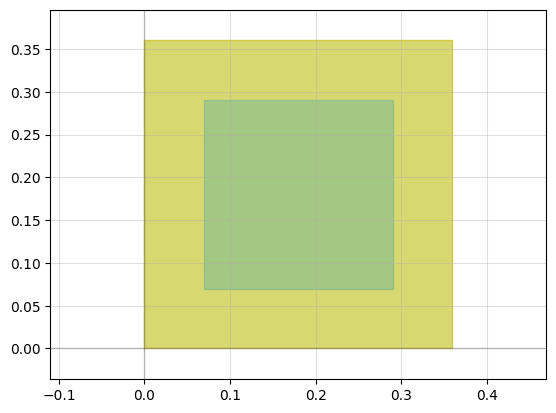

poly_contact: uid 63e11736, ports [], references ['poly_1', 'contact_1', 'metal1_1'], 0 polygons


In [8]:
def poly_contact():
    comp = gf.Component("poly_contact")
    poly_con = comp << poly(0.36,0.36,30)
    con = comp << contact(0.22,0.22,33)
    metal1_con = comp << metal1(0.36,0.36,34)
    con.movex(0.07).movey(0.07)
    return comp
pc5 = poly_contact()
pc5


In [9]:
def inverter(width,length,strength):
    comp = gf.Component("inverter")
    n_inst = comp << nfet_03p3(width,length)
    
    p_inst = comp << pfet_03p3(width*strength,length)  
    p_inst.movey((width+(0.22*2)+0.02)+(0.27*2)+1)
    
    gateext = comp << poly(length,width+(0.22*2)+1,30)
    gateext.movex(0.16+0.44).movey(0.01+width+(0.22*2))
    
    dconn = comp << metal1(0.38,width+(0.22*2)+1.52,34)
    dconn.movex(0.16+(0.44+length+0.07)).movey(0.01+width)
    
    sconn_n = comp << metal1(0.38,1,34)
    sconn_n.movex(0.15).movey(-(1-0.22))
    
    sconn_p = comp << metal1(0.38,1,34)
    sconn_p.movex(0.15).movey((((strength+1)*width)+(0.22*2)+0.02)+(0.27*2)+1+0.22+0.02)
    
    nwell_conn = comp << metal1(1,(0.44*2+length+0.16*2),34)
    nwell_conn.rotate(-90)
    nwell_conn.movey((((strength+1)*width)+(0.22*2)+0.02)+(0.27*2)+1+0.22+0.02+2)
    
    sub_conn = comp << metal1(1,(0.44*2+length+0.16*2),34)
    sub_conn.rotate(-90)
    sub_conn.movey(-(1-0.22))
    
    gateconn = comp << poly_contact()
    gateconn.movex(0.16+0.08).movey(0.01+width+(0.22*2)+0.5)
    
    input_conn = comp << metal1(1,0.36,34)
    input_conn.rotate(180)
    input_conn.movex(0.16+0.08).movey(0.01+width+(0.22*2)+0.5+0.36)
    
    output_conn = comp << metal1(1,0.36,34)
    output_conn.movex(0.16+0.08+length+0.36+0.07).movey(0.01+width+(0.22*2)+0.5)
    
    return comp


You can install `pip install gdsfactory[full]` for better visualization


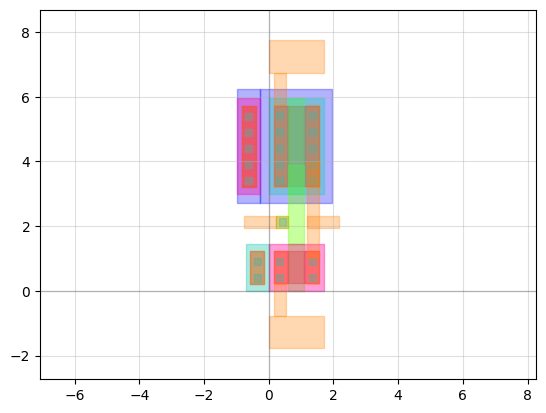

inverter: uid c50e7a28, ports [], references ['nfet_1', 'pfet_1', 'poly_1', 'metal1_1', 'metal1_2', 'metal1_3', 'metal1_4', 'metal1_5', 'poly_contact_1', 'metal1_6', 'metal1_7'], 0 polygons


In [10]:
inv = inverter(1,0.5,2.5)
inv